In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
sys.path.append('/tren/edrixs/scripts')
from plot import plot_image, make_theme, turbo_w
plt.rcParams['font.size'] = 7

In [2]:
yscale = 2.7

def plot_label(ax, count, x=0, y=1.03, color='k'):
    ax.text(x, y, count, fontdict=dict(fontsize=9, weight='bold'), transform=ax.transAxes,
            color=color, horizontalalignment='center', verticalalignment='center')

def format_cbar(cbar, lim=None, padding=0.05):
    if lim is None:
        lim = cbar.ax.get_ylim()
    cbar.outline.set_linewidth(0.5)
    cbar.ax.tick_params(which='major', width=0.5, labelright=False, length=0)
    cbar.ax.set_yticks(lim)
    cbar.set_label('Intensity (arb. units)', labelpad=10, rotation=-90)
    cbar.ax.text(0.5, -padding, lim[0], transform=cbar.ax.transAxes,
                 horizontalalignment='center', verticalalignment='center')
    cbar.ax.text(0.5, 1.+padding, lim[1], transform=cbar.ax.transAxes,
                 horizontalalignment='center', verticalalignment='center')

## Cut map

In [3]:
for scan_no in [115,114,161,155,119,118]:
    scan = dict(np.load(f'data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    print(np.average(scan['Ei']))
print(11.7745-0.559)

11.215
11.215
11.216
11.216
11.215
11.215
11.2155


In [4]:
Cmap_data = []
for scan_no in [115,114,161,155,119,118]:
    scan = dict(np.load(f'data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    Cmap_data.append(dict(x=(scan['x']-scan['xoffset'])/1e3, y=(scan['y']-bg)/scan['ab_factor'],
                           yerr=scan['yerr']/scan['ab_factor'], HKLc=[scan['HKL'][0], scan['HKL'][1], scan['HKL'][2], scan['qc']]))

rixs = np.load('calc_Ba3CeIr2O9/compare/rixs.npy')
Cmap_calc = []
Cmap_calc.append(dict(x=rixs[0], y=rixs[1]*yscale, Q='(-3.3, 0, 17.48)', qc=6))
Cmap_calc.append(dict(x=rixs[0], y=rixs[2]*yscale, Q='(-3.3, 0, 14.57)', qc=5))
Cmap_calc.append(dict(x=rixs[0], y=rixs[3]*yscale, Q='(-0.5, 0, 17.48)', qc=6))
Cmap_calc.append(dict(x=rixs[0], y=rixs[4]*yscale, Q='(-0.5, 0, 14.57)', qc=5))
Cmap_calc.append(dict(x=rixs[0], y=rixs[5]*yscale, Q='(0.5, 0, 17.48)', qc=6))
Cmap_calc.append(dict(x=rixs[0], y=rixs[6]*yscale, Q='(0.5, 0, 14.57)', qc=5))

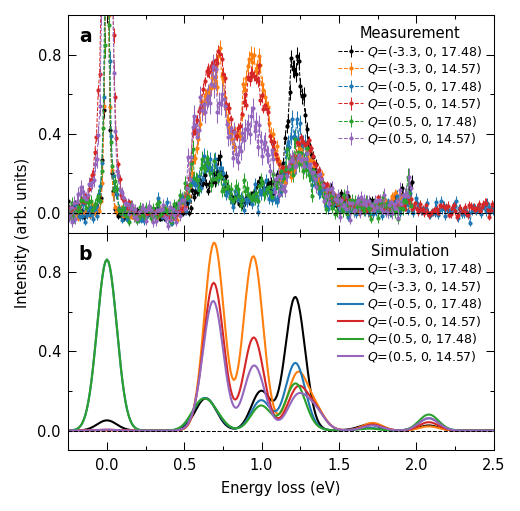

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6.75/2,6.75/2), dpi=150,
                        gridspec_kw=dict(left=0.12, right=0.96, bottom=0.10, top=0.96, hspace=0.))

## plot
for scan1, scan2, color in zip(Cmap_data, Cmap_calc, ['k','C1','C0','C3','C2','C4']):
    choose = scan1['x']<=2.6
    axs[0].errorbar(scan1['x'][choose], scan1['y'][choose], scan1['yerr'][choose], fmt='o', color=color, ls='--', lw=0.5, ms=1,
                    label='$Q$=({:.1f}, {:.0f}, {:.2f})'.format(scan1['HKLc'][0], abs(scan1['HKLc'][1]), scan1['HKLc'][2]))
    choose = scan2['x']<=2.6
    axs[1].plot(scan2['x'][choose], scan2['y'][choose], '-', lw=1, color=color, label='$Q$='+scan2['Q'])
    # axs[1].plot(scan2['x'][choose], scan2['y'][choose], '-', lw=1, color=color)
## format
axs[0].legend(loc='upper right', frameon=False, handletextpad=0.3, labelspacing=0.2, fontsize=6, title='Measurement')
axs[1].legend(loc='upper right', frameon=False, handletextpad=0.3, labelspacing=0.2, fontsize=6, title='Simulation')
for ax in axs:
    make_theme(ax, ticklength=4)
    ax.axhline(y=0., ls='--', lw=0.5, color='k', zorder=100)
axs[0].set_xlim(-0.25, 2.5)
axs[0].set_xticks(np.arange(0.,2.51,0.5))
axs[0].set_ylim(-0.1,1)
axs[0].set_yticks(np.arange(0.,1.01,0.4))
axs[1].set_xlabel('Energy loss (eV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[0].yaxis.set_label_coords(-0.09,0.)
plot_label(axs[0], 'a', x=0.04, y=0.9, color='k')
plot_label(axs[1], 'b', x=0.04, y=0.9, color='k')
# axs[1].text(0.82, 0.88, 'Simulation', color='k', transform=axs[1].transAxes,
#             horizontalalignment='center', verticalalignment='center')

fig.savefig('Ce_CutMap.pdf')

## Energy map

In [6]:
Emap_data = dict(eloss=None, omega=[], intensity=[])
for scan_no in [121,134,135,136,137,138,140,141]:
    scan = dict(np.load(f'data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    if Emap_data['eloss'] is None:
        Emap_data['eloss'] = scan['x']
    Emap_data['omega'].append(scan['Ei'])
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    Emap_data['intensity'].append(np.interp(Emap_data['eloss'], scan['x']-scan['xoffset'], (scan['y']-bg)/scan['ab_factor']))
Emap_data['intensity'] = np.vstack(Emap_data['intensity']).T
Emap_data['eloss'] = Emap_data['eloss'] * 1e-3

Emap_calc = dict(np.load('calc_Ba3CeIr2O9/compare/rixs_Emap.npz'))
Emap_calc['omega'] = Emap_calc['omega'] * 1e-3 + 11.7745
Emap_calc['intensity'] = Emap_calc['rixs'].T * yscale

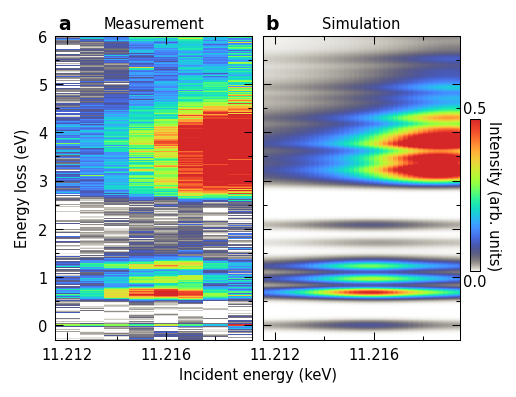

In [7]:
fig = plt.figure(figsize=(6.75/2,6.75/2/4*3), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.10, right=0.49, top=0.92, bottom=0.12) # Emap1
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.51, right=0.90, top=0.92, bottom=0.12) # Emap2
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.92, right=0.94, top=0.70, bottom=0.30) # colorbar
axs  = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] # Emaps
axs += [fig.add_subplot(gs) for gs in gs3] # colorbar

## plot
_, art = plot_image(Emap_data['intensity'], x=Emap_data['omega'], y=Emap_data['eloss'],
                    ax=axs[0], cmap=turbo_w(), vmin=0., vmax=0.5)
_, art = plot_image(Emap_calc['intensity'], x=Emap_calc['omega'], y=Emap_calc['eloss'],
                    ax=axs[1], cmap=turbo_w(), vmin=0., vmax=0.5)
## colorbar
cbar = plt.colorbar(art, ax=axs[1], cax=axs[2])
format_cbar(cbar, padding=0.07)
## format
axs[1].set_xlim(axs[0].get_xlim())
for ax in axs[:2]:
    make_theme(ax, ticklength=4)
    ax.set_ylim(-0.3,6)
    ax.set_yticks(np.arange(0.,6.1,1.))
    ax.set_xticks(np.arange(11.212,11.2191,0.004))
axs[1].tick_params(labelleft=False)
axs[0].set_xlabel('Incident energy (keV)')
axs[0].xaxis.set_label_coords(1.028, -.09)
axs[0].set_ylabel('Energy loss (eV)')
plot_label(axs[0], 'a', x=0.05, y=1.04, color='k')
axs[0].text(0.5, 1.04, 'Measurement', color='k', transform=axs[0].transAxes,
            horizontalalignment='center', verticalalignment='center')
plot_label(axs[1], 'b', x=0.05, y=1.04, color='k')
axs[1].text(0.5, 1.04, 'Simulation', color='k', transform=axs[1].transAxes,
            horizontalalignment='center', verticalalignment='center')

fig.savefig('Ce_EnergyMap.pdf')

## $L$ dependence

In [8]:
for scan_no in np.hstack([np.arange(147,156),157,np.arange(160,163),164]):
    scan = dict(np.load(f'data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    print(np.average(scan['Ei']))
print(11.7745-0.5585)

11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216
11.216


In [9]:
Ldep_data = dict(eloss=None, HKL=[], intensity=[])
for scan_no in np.hstack([np.arange(147,156),157,np.arange(160,163),164]):
    scan = dict(np.load(f'data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    if Ldep_data['eloss'] is None:
        Ldep_data['eloss'] = scan['x']
    Ldep_data['HKL'].append(scan['HKL'])
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    Ldep_data['intensity'].append(np.interp(Ldep_data['eloss'], scan['x']-scan['xoffset'], (scan['y']-bg)/scan['ab_factor']))
Ldep_data['intensity'] = np.vstack(Ldep_data['intensity']).T
Ldep_data['HKL'] = np.vstack(Ldep_data['HKL'])
Ldep_data['eloss'] = Ldep_data['eloss'] * 1e-3

Ldep_calc = dict(np.load('calc_Ba3CeIr2O9/compare/rixs_Ldep.npz'))
Ldep_calc['intensity'] = Ldep_calc['rixs'].T * yscale

In [10]:
d = 2.53614
factor = 0.426991866 * d / (2*np.pi)

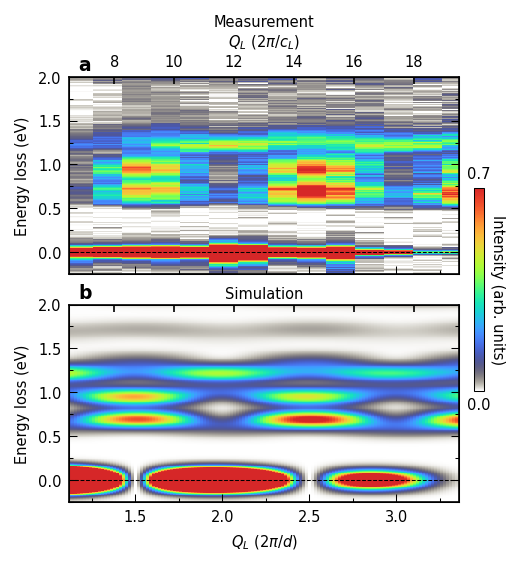

In [11]:
fig = plt.figure(figsize=(6.75/2,6.75/2), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.12, right=0.89, top=0.94, bottom=0.55) # Ldep1
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.12, right=0.89, top=0.49, bottom=0.10) # Ldep2
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.92, right=0.94, top=0.72, bottom=0.32)  # colorbar
axs =  [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] # Ldeps
axs += [fig.add_subplot(gs) for gs in gs3] # colorbar

_, art = plot_image(Ldep_data['intensity'], x=Ldep_data['HKL'][:,2]*factor, y=Ldep_data['eloss'],
                    ax=axs[0], cmap=turbo_w(), vmin=0., vmax=0.7)
choose = Ldep_calc['eloss']<=2.1
_, art = plot_image(Ldep_calc['intensity'][choose,:], x=Ldep_calc['Ls']*factor, y=Ldep_calc['eloss'][choose],
                    ax=axs[1], cmap=turbo_w(), vmin=0., vmax=0.7)
## colorbar
cbar = plt.colorbar(art, ax=axs[1], cax=axs[2])
format_cbar(cbar, padding=0.07)
## format
for ax in axs[:2]:
    make_theme(ax, ticklength=4)
    ax.axhline(y=0., ls='--', lw=0.5, color='k', zorder=100)
    ax.set_ylim(-0.25,2)
    ax.set_yticks(np.arange(0.,2.1,0.5))
    # ax.set_xlim(6.5,19.5,5)
    ax.set_xlim(1.12,3.36)
    # ax.set_xticks(np.arange(8.,19.1,2.))
    ax.set_xticks(np.arange(1.5,3.5,0.5))
    ax.set_ylabel('Energy loss (eV)')
axs[0].tick_params(labelbottom=False)
# axs[1].set_xlabel('(-0.5, 0, $L$) (r.l.u.)')
# axs[1].set_xlabel('$L$ (r.l.u.)')
# axs[1].set_xlabel('$L\cdot c^*_L$ ($2\pi/d$)')
axs[1].set_xlabel('$Q_L$ ($2\pi/d$)')
plot_label(axs[0], 'a', x=0.04, y=1.06, color='k')
axs[0].set_title('Measurement', fontsize=7, pad=3)
plot_label(axs[1], 'b', x=0.04, y=1.06, color='k')
axs[1].set_title('Simulation', fontsize=7, pad=3)
axs_top = axs[0].twiny()
axs_top.set_xlim(1.12/factor,3.36/factor)
# axs_top.set_xlabel('$L\cdot c^*_L$ ($2\pi/c_L$)')
axs_top.set_xlabel('$Q_L$ ($2\pi/c_L$)')
axs_top.tick_params(direction='in')
axs_top = axs[1].twiny()
axs_top.set_xlim(1.12/factor,3.36/factor)
axs_top.tick_params(labeltop=False,direction='in')

fig.savefig('Ce_Lmap.pdf', bbox_inches='tight')

# Levels

In [ ]:
%matplotlib inline
plt.rcParams['font.size'] = 7

In [ ]:
def check_degenaracy(evals, energy):
    choose = evals==energy
    degeneracy = np.sum(choose)
    if degeneracy<=8:
        color = 'C{}'.format(degeneracy-1)
        ms = degeneracy
    else:
        color = 'C8'
        ms = degeneracy
    return ms, color

In [ ]:
def plot_label(ax, count, x=0, y=1.03, color='k'):
    ax.text(x, y, count, fontdict=dict(fontsize=9, weight='bold'), transform=ax.transAxes,
            color=color, horizontalalignment='center', verticalalignment='center

In [ ]:
yscale = 2.7

def plot_SOC(ax):
    dth = 0.
    Vdd = 0.
    for soc in np.arange(0.002,0.331,0.002):
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        ax.plot(soc, np.mean(evals[:4]), 'o', ms=1, color='C3')
        ax.plot(soc, np.mean(evals[4:20]), 'o', ms=1, color='C4')
        ax.plot(soc, np.mean(evals[20:36]), 'o', ms=1, color='C0')
    # format
    make_theme(ax, ticklength=4)
    ax.set_title('SOC', fontsize=7, pad=3)
    ax.set_xlabel('$\\zeta$ (eV)')
    ax.set_xlim(0,0.33)
    ax.set_xticks(np.arange(0.,0.331,0.2))
    ax.set_ylabel('Energy loss (eV)')
    ax.set_ylim(-0.2,2.25)
    ax.set_yticks(np.arange(0.,2.1,0.5))

def plot_CEF(ax):
    soc = 0.33
    Vdd = 0.
    for dth in np.arange(-0.001,3.801,0.1):
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        energies = np.unique(evals)
        ax.plot(dth, energies[0], 'o', ms=1, color='C3')
        for energy in energies[1:]:
            if energy<=1.:
                ax.plot(dth, np.mean(energy), 'o', ms=1, color='C4')
            else:
                ax.plot(dth, np.mean(energy), 'o', ms=1, color='C0')
    # format
    make_theme(ax, ticklength=4)
    ax.tick_params(labelleft=False)
    ax.set_title('CEF', fontsize=7, pad=3)
    ax.set_xlabel('$-\\Delta\\theta$ (deg)')
    ax.set_xlim(0,3.8)
    ax.set_xticks(np.arange(0.,3.801,2.))
    ax.set_ylim(-0.2,2.25)
    ax.set_yticks(np.arange(0.,2.1,0.5))

def plot_RIXS(ax):
    rixs = np.load('calc_Ba3CeIr2O9/rixs.npy')
    choose = np.logical_and(rixs[0]>=-0.5, rixs[0]<=2.25)
    ax.plot(rixs[4][choose]*yscale, rixs[0][choose], '-', lw=1, color='C5', label='(-0.5, 0, 14.57)')
    ax.plot(rixs[3][choose]*yscale, rixs[0][choose], '-', lw=1, color='C6', label='(-0.5, 0, 17.48)')
    # format
    make_theme(ax, ticklength=4)
    ax.tick_params(labelleft=False)
    ax.set_title('RIXS simulation', fontsize=7, pad=3)
    ax.set_xlabel('Intensity (arb. units)')
    ax.set_xlim(-0.1,0.8)
    ax.set_xticks(np.arange(0.,0.801,0.3))
    ax.legend(loc='upper right', frameon=False, handletextpad=0.3, labelspacing=0.2, fontsize=6)
    ax.set_ylim(-0.2,2.25)
    ax.set_yticks(np.arange(0.,2.1,0.5))

def plot_hopping(ax):
    soc = 0.33
    dth = 3.8
    for Vdd in np.arange(0.,1.151,0.02):
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        for energy in np.unique(evals[:4]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C3')
        for energy in np.unique(evals[4:20]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        for energy in np.unique(evals[20:]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C0')
    for Vdd in np.arange(1.16,1.261,0.02):
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        for energy in np.unique(evals[:4]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C3')
        for energy in np.unique(evals[4:17]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        for energy in np.unique(evals[18:21]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        ax.plot(Vdd, evals[17], 'o', ms=1, color='C0')
        for energy in np.unique(evals[21:]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C0')
    for Vdd in np.arange(1.28,1.361,0.02):
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        ax.plot(Vdd, evals[0], 'o', ms=1, color='C3')
        for energy in np.unique(evals[8:17]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        for energy in np.unique(evals[18:21]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        ax.plot(Vdd, evals[17], 'o', ms=1, color='C0')
        for energy in np.unique(evals[21:]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C0')
    for Vdd in np.arange(1.38,1.401,0.02):
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        ax.plot(Vdd, evals[0], 'o', ms=1, color='C3')
        for energy in np.unique(evals[5:8]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C3')
        for energy in np.unique(evals[1:5]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        for energy in np.unique(evals[8:15]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        for energy in np.unique(evals[16:21]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C4')
        ax.plot(Vdd, evals[15], 'o', ms=1, color='C0')
        for energy in np.unique(evals[21:]):
            ax.plot(Vdd, energy, 'o', ms=1, color='C0')
    Vdd = 1.28
    evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
    evals = evals - np.min(evals)
    ax.plot(Vdd, evals[1], 'o', ms=1, color='C4')
    ax.plot(Vdd, evals[3], 'o', ms=1, color='C4')
    ax.plot(Vdd, np.mean(evals[6:8]), 'o', ms=1, color='C4')
    ax.plot(Vdd, evals[2], 'o', ms=1, color='C3')
    ax.plot(Vdd, np.mean(evals[4:6]), 'o', ms=1, color='C3')
    for Vdd in [1.3,1.32]:
        evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
        evals = evals - np.min(evals)
        ax.plot(Vdd, evals[1], 'o', ms=1, color='C4')
        ax.plot(Vdd, evals[2], 'o', ms=1, color='C4')
        ax.plot(Vdd, np.mean(evals[6:8]), 'o', ms=1, color='C4')
        ax.plot(Vdd, evals[3], 'o', ms=1, color='C3')
        ax.plot(Vdd, np.mean(evals[4:6]), 'o', ms=1, color='C3')
    Vdd = 1.34
    evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
    evals = evals - np.min(evals)
    ax.plot(Vdd, evals[1], 'o', ms=1, color='C4')
    ax.plot(Vdd, evals[2], 'o', ms=1, color='C4')
    ax.plot(Vdd, np.mean(evals[4:6]), 'o', ms=1, color='C4')
    ax.plot(Vdd, evals[3], 'o', ms=1, color='C3')
    ax.plot(Vdd, np.mean(evals[6:8]), 'o', ms=1, color='C3')
    Vdd = 1.36
    evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(soc, -dth, Vdd)), 6)[:36]
    evals = evals - np.min(evals)
    ax.plot(Vdd, evals[1], 'o', ms=1, color='C4')
    ax.plot(Vdd, evals[2], 'o', ms=1, color='C4')
    ax.plot(Vdd, np.mean(evals[3:5]), 'o', ms=1, color='C4')
    ax.plot(Vdd, evals[5], 'o', ms=1, color='C3')
    ax.plot(Vdd, np.mean(evals[6:8]), 'o', ms=1, color='C3')
    # format
    make_theme(ax, ticklength=4)
    ax.tick_params(labelleft=False)
    ax.set_title('Hopping', fontsize=7, pad=3)
    ax.set_xlabel('$V_{dd}$ (eV)')
    ax.set_xlim(0.,1.4)
    ax.set_xticks(np.arange(0.,1.401,0.4))
    ax.set_ylim(-0.2,2.25)
    ax.set_yticks(np.arange(0.,2.1,0.5))

def plot_level(ax):
    lw = 1
    dash_params = dict(ls='-', color='gray', zorder=-1, lw=0.5)
    # plot
    ax.plot([-16.5,-13.5], [0.,0.], '-', lw=lw, color='k')
    ax.plot([16.5,13.5],   [0.,0.], '-', lw=lw, color='k')
    # SOC
    evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(0.33,0.,0.)), 6)
    energy1A = np.mean(evals[:4])/2 # J=1/2 energy
    energy1B = np.mean(evals[4:20]) - energy1A # J=3/2 energy
    energy1C = np.mean(evals[20:36])/2 # J=3/2 energy, should be same as energy 1B
    GS = (energy1A*2 + energy1B*4) / 6
    energy1A = energy1A - GS
    energy1B = energy1B - GS
    ax.plot([-11.5,-8.5],  [energy1A,energy1A], '-', lw=lw, color='C3')
    ax.plot([11.5,8.5],    [energy1A,energy1A], '-', lw=lw, color='C3')
    ax.plot([-13.5,-11.5], [0.,energy1A], **dash_params)
    ax.plot([13.5,11.5],   [0.,energy1A], **dash_params)
    ax.text(-10, energy1A+0.06, '$J$=1/2', color='C3', horizontalalignment='center', fontsize=6)
    ax.text(10,  energy1A+0.06, '$J$=1/2', color='C3', horizontalalignment='center', fontsize=6)
    ax.plot([-11.5,-8.5],  [energy1B,energy1B], '-', lw=lw, color='C0')
    ax.plot([11.5,8.5],    [energy1B,energy1B], '-', lw=lw, color='C0')
    ax.plot([-13.5,-11.5], [0.,energy1B], **dash_params)
    ax.plot([13.5,11.5],   [0.,energy1B], **dash_params)
    ax.text(-10, energy1B+0.06, '$J$=3/2', color='C0', horizontalalignment='center', fontsize=6)
    ax.text(10,  energy1B+0.06, '$J$=3/2', color='C0', horizontalalignment='center', fontsize=6)
    ## CEF
    evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(0.33,-3.8,0.)), 6)
    energy2A = np.mean(evals[:4])/2 # J=1/2 energy
    energy2B = np.mean(evals[4:12]) - energy2A # J=1/2 energy
    energy2C = np.mean(evals[12:20]) - energy2A # J=1/2 energy
    GS = np.mean([energy2A, energy2B, energy2C])
    energy2A = energy2A - GS
    energy2B = energy2B - GS
    energy2C = energy2C - GS
    ax.plot([-6.5,-3.5], [energy2A,energy2A], '-', lw=lw, color='C3')
    ax.plot([6.5,3.5],   [energy2A,energy2A], '-', lw=lw, color='C3')
    ax.plot([-8.5,-6.5], [energy1A,energy2A], **dash_params)
    ax.plot([8.5,6.5],   [energy1A,energy2A], **dash_params)
    ax.plot([-6.5,-3.5], [energy2B,energy2B], '-', lw=lw, color='C0')
    ax.plot([6.5,3.5],   [energy2B,energy2B], '-', lw=lw, color='C0')
    ax.plot([-8.5,-6.5], [energy1B,energy2B], **dash_params)
    ax.plot([8.5,6.5],  [energy1B,energy2B], **dash_params)
    ax.plot([-6.5,-3.5], [energy2C,energy2C], '-', lw=lw, color='C0')
    ax.plot([6.5,3.5],   [energy2C,energy2C], '-', lw=lw, color='C0')
    ax.plot([-8.5,-6.5], [energy1B,energy2C], **dash_params)
    ax.plot([8.5,6.5],   [energy1B,energy2C], **dash_params)
    # Hopping
    evals = np.round(np.load('Ird10_param_dep/evals_soc_{:.3f}_dth_{:.2f}_Vdd_{:.2f}.npy'.format(0.33,-3.8,1.4)), 6)[:36]
    GS = (evals[0] + np.mean(evals[5:8])*3) / 4 - energy2A
    evals = evals - GS
    energy3A = np.mean(evals[:1])
    ax.plot([-1.5,1.5], [energy3A,energy3A], '-', lw=lw, color='C3')
    ax.plot([-3.5,-1.5], [energy2A,energy3A], **dash_params)
    ax.plot([3.5,1.5],   [energy2A,energy3A], **dash_params)
    ax.text(0, energy3A+0.06, '$J_{eff}$=0', color='C3', horizontalalignment='center', fontsize=6)
    energy3B = np.mean(evals[5:8])
    ax.plot([-1.5,1.5], [energy3B,energy3B], '-', lw=lw, color='C3')
    ax.plot([-3.5,-1.5], [energy2A,energy3B], **dash_params)
    ax.plot([3.5,1.5],   [energy2A,energy3B], **dash_params)
    ax.text(0, energy3B+0.06, '$J_{eff}$=1', color='C3', horizontalalignment='center', fontsize=6)
    evals_tmp = np.hstack([evals[8:12], evals[13:15], evals[16:18]])
    energies = np.unique(evals_tmp)
    for energy in energies:
        ax.plot([-1.5,1.5], [energy,energy], '-', lw=lw, color='C4')
        ax.plot([-3.5,-1.5], [energy2A,energy], **dash_params)
        ax.plot([-3.5,-1.5], [energy2B,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2A,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2B,energy], **dash_params)
    evals_tmp = np.hstack([evals[1:5], evals[12], evals[18:21]])
    energies = np.unique(evals_tmp)
    for energy in energies:
        ax.plot([-1.5,1.5],  [energy,energy], '-', lw=lw, color='C4')
        ax.plot([-3.5,-1.5], [energy2A,energy], **dash_params)
        ax.plot([-3.5,-1.5], [energy2C,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2A,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2C,energy], **dash_params)
    evals_tmp = evals[29:33]
    energies = np.unique(evals_tmp)
    for energy in energies:
        ax.plot([-1.5,1.5],  [energy,energy], '-', lw=lw, color='C0')
        ax.plot([-3.5,-1.5], [energy2B,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2B,energy], **dash_params)
    evals_tmp = evals[21:29]
    energies = np.unique(evals_tmp)
    for energy in energies:
        ax.plot([-1.5,1.5],  [energy,energy], '-', lw=lw, color='C0')
        ax.plot([-3.5,-1.5], [energy2B,energy], **dash_params)
        ax.plot([-3.5,-1.5], [energy2C,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2B,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2C,energy], **dash_params)
    evals_tmp = np.hstack([evals[15], evals[33:36]])
    energies = np.unique(evals_tmp)
    for energy in energies:
        ax.plot([-1.5,1.5],  [energy,energy], '-', lw=lw, color='C0')
        ax.plot([-3.5,-1.5], [energy2C,energy], **dash_params)
        ax.plot([3.5,1.5],   [energy2C,energy], **dash_params)
    # format
    make_theme(ax, minorx=False, ticklength=4)
    ax.tick_params(top=False)
    ax.plot([-17.,-3.,-3.,-17.,-17.], [-0.6,-0.6,0.5,0.5,-0.6], lw=0.5, ls='--', color='k', zorder=100)
    ax.plot([17.,3.,3.,17.,17.], [-0.6,-0.6,0.5,0.5,-0.6], lw=0.5, ls='--', color='k', zorder=100)
    ax.text(-10., -0.8, 'Ir1', color='k', horizontalalignment='center')
    ax.text(10., -0.8, 'Ir2', color='k', horizontalalignment='center')
    ax.set_xlim(-18.5,18.5)
    ax.set_xticks([-12.5,-7.5,0.,7.5,12.5])
    ax.set_xticklabels(['SOC','CEF','Hopping','CEF','SOC'])
    ax.set_ylabel('Energy (eV)')
    # ax.set_ylim(-1.2,1.25)
    ax.set_ylim(energy3A-0.2,energy3A+2.25)
    ax.set_yticks(np.arange(-1.,1.01,0.5))

In [ ]:
fig = plt.figure(figsize=(6.75,6.75/3), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.06, right=0.14, top=0.93, bottom=0.14) # SOC
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.14, right=0.22, top=0.93, bottom=0.14) # CEF
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.22, right=0.38, top=0.93, bottom=0.14) # hopping
gs4 = fig.add_gridspec(nrows=1, ncols=1, left=0.38, right=0.54, top=0.93, bottom=0.14) # RIXS
gs5 = fig.add_gridspec(nrows=1, ncols=1, left=0.62, right=0.98, top=0.93, bottom=0.14) # levels
axs =  [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
axs += [fig.add_subplot(gs) for gs in gs3] + [fig.add_subplot(gs) for gs in gs4]
axs += [fig.add_subplot(gs) for gs in gs5]

plot_SOC(axs[0])
plot_label(axs[0], 'a', x=0.1, y=1.04, color='k')

plot_CEF(axs[1])
plot_label(axs[1], 'b', x=0.1, y=1.04, color='k')

plot_hopping(axs[2])
plot_label(axs[2], 'c', x=0.06, y=1.04, color='k')

plot_RIXS(axs[3])
plot_label(axs[3], 'd', x=0.06, y=1.04, color='k')

plot_level(axs[4])

axs[4].plot(np.nan, np.nan, '-', lw=1, color='C0', label=r'$|{3/2}\rangle\otimes |{3/2}\rangle$')
axs[4].plot(np.nan, np.nan, '-', lw=1, color='C4', label=r'$|{1/2}\rangle\otimes |{3/2}\rangle$')
axs[4].plot(np.nan, np.nan, '-', lw=1, color='C3', label=r'$|{1/2}\rangle\otimes |{1/2}\rangle$')
axs[4].legend(loc='upper right', frameon=False, fontsize=6, handletextpad=0.3, labelspacing=0.2)
plot_label(axs[4], 'e', x=0.05, y=1.04, color='k')

fig.savefig('level.pdf')